In [20]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [21]:
df = pd.read_csv('./data/cropdata_updated.csv')
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16411 entries, 0 to 16410
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   crop ID         16411 non-null  object 
 1   soil_type       16411 non-null  object 
 2   Seedling Stage  16411 non-null  object 
 3   MOI             16411 non-null  int64  
 4   temp            16411 non-null  int64  
 5   humidity        16411 non-null  float64
 6   result          16411 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 897.6+ KB
None

First few rows:
  crop ID   soil_type Seedling Stage  MOI  temp  humidity  result
0   Wheat  Black Soil    Germination    1    25      80.0       1
1   Wheat  Black Soil    Germination    2    26      77.0       1
2   Wheat  Black Soil    Germination    3    27      74.0       1
3   Wheat  Black Soil    Germination    4    28      71.0       1
4   Wheat  Black Soil    Germination    5    29      68.0

In [22]:
df.head()

,crop ID,soil_type,Seedling Stage,MOI,temp,humidity,result
0,Wheat,Black Soil,Germination,1,25,80.0,1
1,Wheat,Black Soil,Germination,2,26,77.0,1
2,Wheat,Black Soil,Germination,3,27,74.0,1
3,Wheat,Black Soil,Germination,4,28,71.0,1
4,Wheat,Black Soil,Germination,5,29,68.0,1


In [23]:
df.describe()


,MOI,temp,humidity,result
count,16411.000000,16411.000000,16411.000000,16411.000000
mean,43.695387,28.832612,63.487752,0.516178
std,27.160264,9.701465,22.630965,0.621691
min,1.000000,13.000000,15.000000,0.000000
25%,21.000000,20.000000,44.000000,0.000000
50%,41.000000,28.000000,69.200000,0.000000
75%,64.000000,37.000000,84.000000,1.000000
max,100.000000,46.000000,91.000000,2.000000


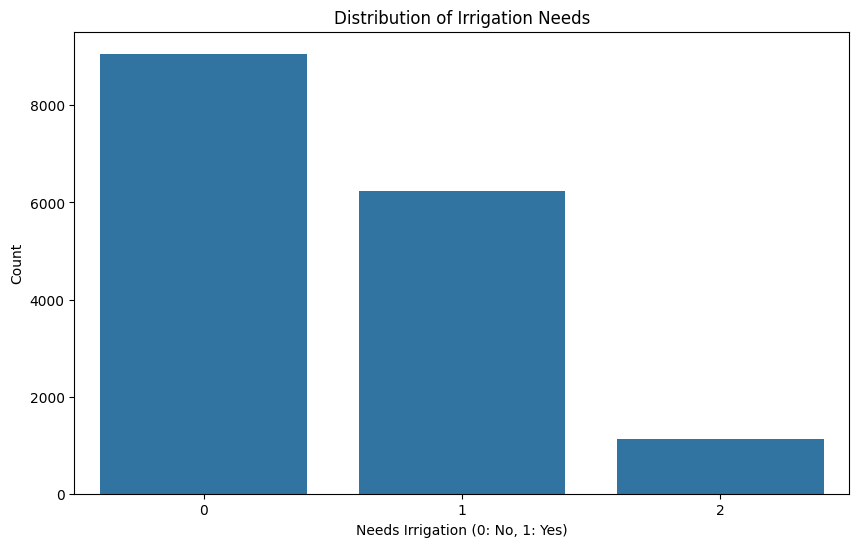

In [24]:
# Visualization 1: Distribution of Irrigation Needs
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='result')
plt.title('Distribution of Irrigation Needs')
plt.xlabel('Needs Irrigation (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

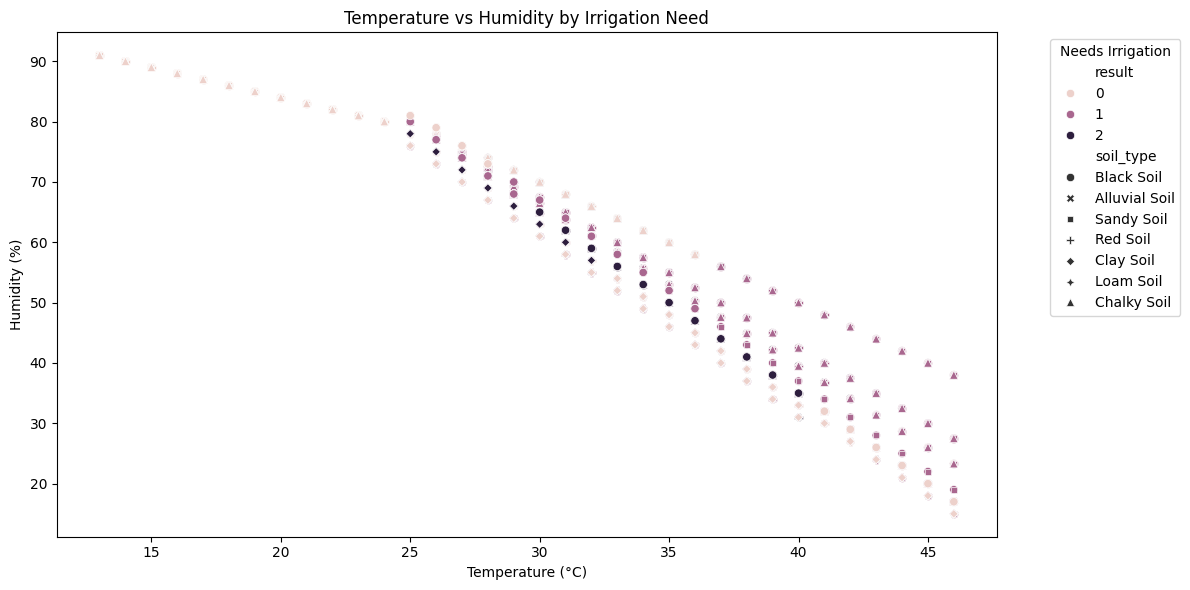

In [25]:
# Visualization 2: Temperature and Humidity Relationship
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='temp', y='humidity', hue='result', style='soil_type')
plt.title('Temperature vs Humidity by Irrigation Need')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.legend(title='Needs Irrigation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

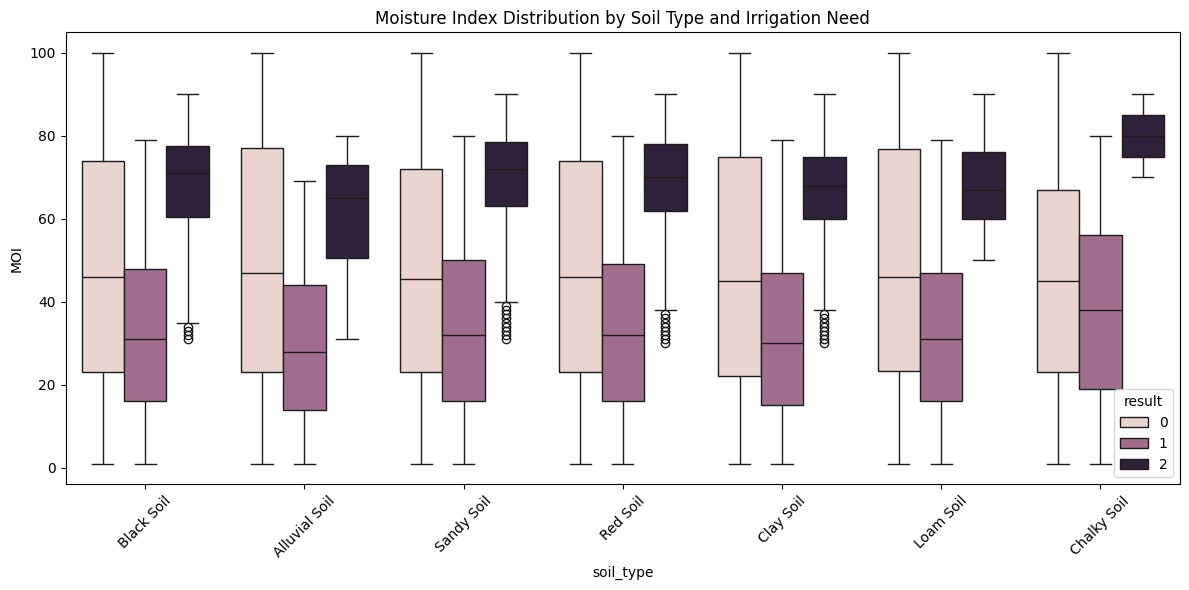

In [26]:
# Visualization 3: Moisture Index Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='soil_type', y='MOI', hue='result')
plt.title('Moisture Index Distribution by Soil Type and Irrigation Need')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# encode crop ID, soil_type, Seedling Stage

le = LabelEncoder()
df['crop ID'] = le.fit_transform(df['crop ID'])
print(dict(zip(le.classes_, le.transform(le.classes_))))
df['soil_type'] = le.fit_transform(df['soil_type'])
print(dict(zip(le.classes_, le.transform(le.classes_))))
df['Seedling Stage'] = le.fit_transform(df['Seedling Stage'])
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'Carrot': np.int64(0), 'Chilli': np.int64(1), 'Potato': np.int64(2), 'Tomato': np.int64(3), 'Wheat': np.int64(4)}
{'Alluvial Soil': np.int64(0), 'Black Soil': np.int64(1), 'Chalky Soil': np.int64(2), 'Clay Soil': np.int64(3), 'Loam Soil': np.int64(4), 'Red Soil': np.int64(5), 'Sandy Soil': np.int64(6)}
{'Flowering': np.int64(0), 'Fruit/Grain/Bulb Formation': np.int64(1), 'Germination': np.int64(2), 'Harvest': np.int64(3), 'Maturation': np.int64(4), 'Pollination': np.int64(5), 'Seedling Stage': np.int64(6), 'Vegetative Growth / Root or Tuber Development': np.int64(7)}


In [28]:
df.head()

,crop ID,soil_type,Seedling Stage,MOI,temp,humidity,result
0,4,1,2,1,25,80.0,1
1,4,1,2,2,26,77.0,1
2,4,1,2,3,27,74.0,1
3,4,1,2,4,28,71.0,1
4,4,1,2,5,29,68.0,1


In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')

x = df.drop('result', axis=1)
y = df['result']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

c:\Users\yiish\Documents\MYPROJECTS\irrigation_prediction\myvenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test), callbacks=[earlyStopping])

Epoch 1/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5599 - loss: 2.0606 - val_accuracy: 0.8410 - val_loss: 0.2485
Epoch 2/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7529 - loss: 0.3249 - val_accuracy: 0.8748 - val_loss: 0.0807
Epoch 3/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8123 - loss: 0.1466 - val_accuracy: 0.8660 - val_loss: -0.1218
Epoch 4/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8265 - loss: -0.0065 - val_accuracy: 0.8599 - val_loss: -0.3235
Epoch 5/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8245 - loss: -0.2860 - val_accuracy: 0.8669 - val_loss: -0.6190
Epoch 6/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8348 - loss: -1.0774 - val_accuracy: 0.8693 - val_loss: -1.6995
Epoch 7/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8277 - loss: -1.6650 - val_accuracy: 0.8581 - val_loss: -3.7292
Epoch 8/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8279 - loss: -2.8174 - val_ac

In [31]:
model.evaluate(x_test, y_test)

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8518 - loss: -1427.3508


[-1375.027099609375, 0.8516600728034973]

In [32]:
# ... existing code ...
import os
import pickle

# Create models directory in parent folder
os.makedirs('../models', exist_ok=True)

# Save model one level up
with open("../models/cropmodel.pkl", "wb") as f:
    pickle.dump(model, f)

In [33]:
testing = pd.DataFrame([[4,1,2,5, 29,68]], columns=['crop ID', 'soil_type', 'Seedling Stage', 'fertilizer', 'temperature', 'humidity'])
model.predict(testing)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[0.6094401]], dtype=float32)

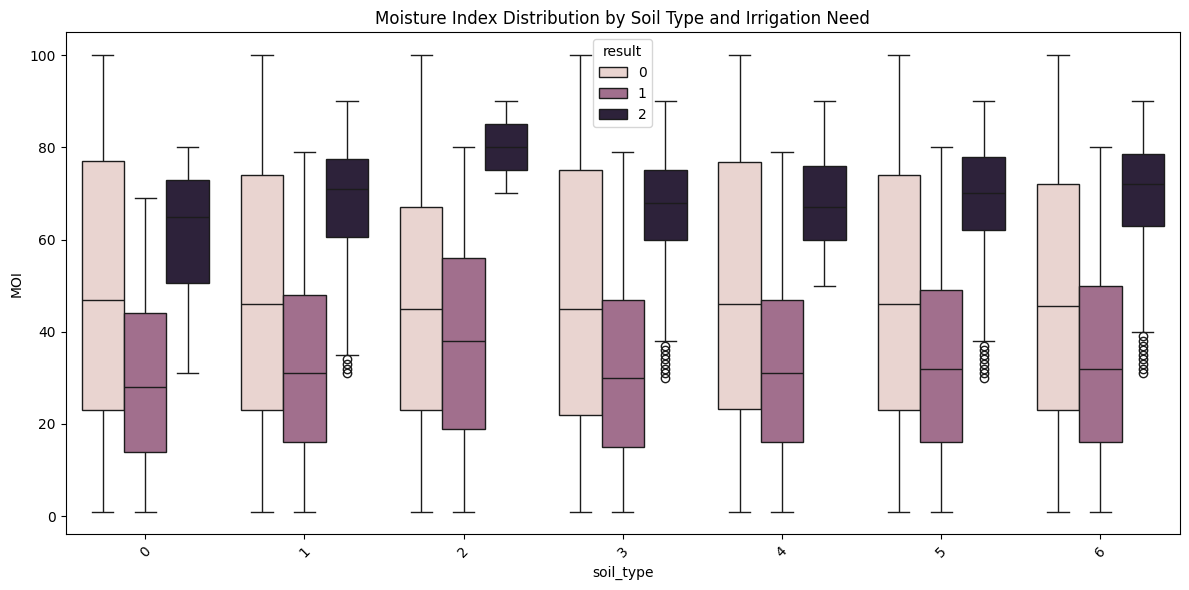

In [34]:
# Visualization 3: Moisture Index Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='soil_type', y='MOI', hue='result')
plt.title('Moisture Index Distribution by Soil Type and Irrigation Need')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


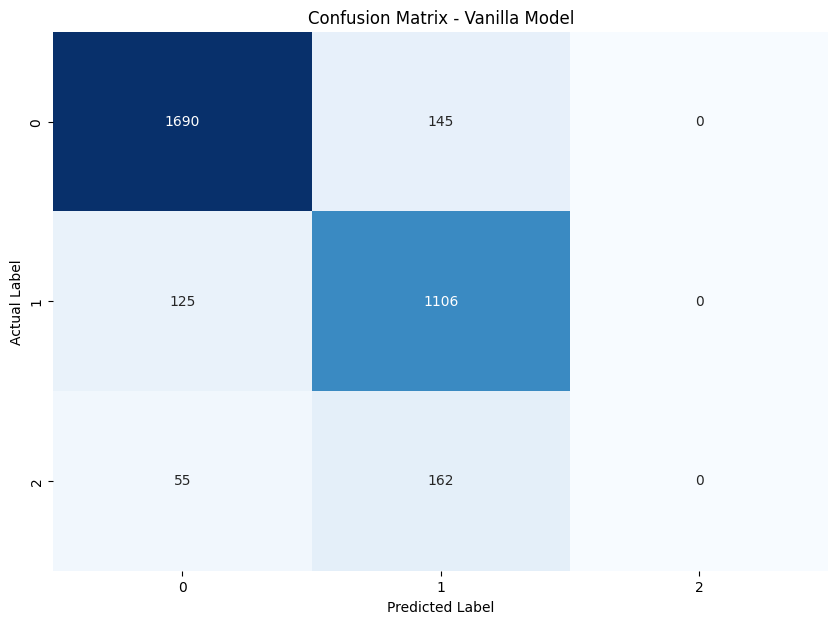

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test is defined elsewhere in the notebook
# y_test: true labels

# Predict the labels for the test set
Y_pred_vanilla = model.predict(x_test)
Y_pred_vanilla = (Y_pred_vanilla > 0.5).astype(int)

# Calculate the confusion matrix
vanilla_conf_matrix = confusion_matrix(y_test, Y_pred_vanilla)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(vanilla_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Vanilla Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
